<a href="https://colab.research.google.com/github/kozen88/Diabetes_Onward_Monitor/blob/main/diabetes_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Predicting Diabetes Progression in High-Risk Patients
The scikit-learn diabetes dataset contains clinical examples of patients with diabetes. It is a regression dataset whose target is a quantitative measure representing the progression of the disease.<br>
<br>

It can be loaded using the following import: from sklearn.datasets import load_diabetes and then using the load_diabetes function to obtain the various data (more details in the official documentation: https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html).<br>
<br>


The columns of the dataset are as follows:
1. age: age
2. sex: gender
3. bmi: body mass index
4. bp: average blood pressure
5. s1: total serum cholesterol
6. s2: low-density lipoproteins
7. s3: high-density lipoproteins
8. s4: total cholesterol/HDL
9. s5: triglycerides
10. s6: blood sugar level<br>

<br>

-----

<br>**You need to create a regression model that, starting from this dataset, tries to predict the target.**<br>
<br>
**Explain the various steps of creating the model and selecting the variables, and comment on the results obtained.**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_diabetes
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split, KFold, learning_curve
from sklearn.feature_selection import SelectKBest, f_regression, r_regression, mutual_info_regression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [3]:
# this raw of code allow to get the dataset divided into feature input and target as X and y
# and the last line get a descriction of the dataset and what the feature represent
# uncomment if you want to proced this way but remeber to skip the following raw of code
# and make the rename of the columns before training the model

# X, y = load_diabetes(return_X_y=True, as_frame=True, scaled=False)
print(load_diabetes()['DESCR'])

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

Lets start with importing the date and exctract a dataframe pandas which contain the dataset with the feauters and target.

In [4]:
# getting a bunch object similar to a dictonary in python
diabetes_bunch = load_diabetes(as_frame=True, scaled=False)

In [5]:
# take a look at the type
print(type(diabetes_bunch))

<class 'sklearn.utils._bunch.Bunch'>


In [6]:
help('sklearn.utils._bunch.Bunch')

Help on class Bunch in sklearn.utils._bunch:

sklearn.utils._bunch.Bunch = class Bunch(builtins.dict)
 |  sklearn.utils._bunch.Bunch(**kwargs)
 |  
 |  Container object exposing keys as attributes.
 |  
 |  Bunch objects are sometimes used as an output for functions and methods.
 |  They extend dictionaries by enabling values to be accessed by key,
 |  `bunch["value_key"]`, or by an attribute, `bunch.value_key`.
 |  
 |  Examples
 |  --------
 |  >>> from sklearn.utils import Bunch
 |  >>> b = Bunch(a=1, b=2)
 |  >>> b['b']
 |  2
 |  >>> b.b
 |  2
 |  >>> b.a = 3
 |  >>> b['a']
 |  3
 |  >>> b.c = 6
 |  >>> b['c']
 |  6
 |  
 |  Method resolution order:
 |      Bunch
 |      builtins.dict
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __dir__(self)
 |      Default dir() implementation.
 |  
 |  __getattr__(self, key)
 |  
 |  __init__(self, **kwargs)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  __setattr__(self, key, value)
 |      Im

In [7]:
# extracction of the dataframe wanted
features = diabetes_bunch.data

In [8]:
features

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,59.0,2.0,32.1,101.00,157.0,93.2,38.0,4.00,4.8598,87.0
1,48.0,1.0,21.6,87.00,183.0,103.2,70.0,3.00,3.8918,69.0
2,72.0,2.0,30.5,93.00,156.0,93.6,41.0,4.00,4.6728,85.0
3,24.0,1.0,25.3,84.00,198.0,131.4,40.0,5.00,4.8903,89.0
4,50.0,1.0,23.0,101.00,192.0,125.4,52.0,4.00,4.2905,80.0
...,...,...,...,...,...,...,...,...,...,...
437,60.0,2.0,28.2,112.00,185.0,113.8,42.0,4.00,4.9836,93.0
438,47.0,2.0,24.9,75.00,225.0,166.0,42.0,5.00,4.4427,102.0
439,60.0,2.0,24.9,99.67,162.0,106.6,43.0,3.77,4.1271,95.0
440,36.0,1.0,30.0,95.00,201.0,125.2,42.0,4.79,5.1299,85.0


In [9]:
# Lets change the name of same columns to be more significant
new_name = ['cholesterol', 'LDL', 'HDL', 'CF-HDL', 'Trig', 'glucose']
features = features.rename(columns={'s1': new_name[0], 's2': new_name[1], 's3': new_name[2], 's4': new_name[3], 's5': new_name[4], 's6': new_name[5]})

In [10]:
features

,age,sex,bmi,bp,cholesterol,LDL,HDL,CF-HDL,Trig,glucose
0,59.0,2.0,32.1,101.00,157.0,93.2,38.0,4.00,4.8598,87.0
1,48.0,1.0,21.6,87.00,183.0,103.2,70.0,3.00,3.8918,69.0
2,72.0,2.0,30.5,93.00,156.0,93.6,41.0,4.00,4.6728,85.0
3,24.0,1.0,25.3,84.00,198.0,131.4,40.0,5.00,4.8903,89.0
4,50.0,1.0,23.0,101.00,192.0,125.4,52.0,4.00,4.2905,80.0
...,...,...,...,...,...,...,...,...,...,...
437,60.0,2.0,28.2,112.00,185.0,113.8,42.0,4.00,4.9836,93.0
438,47.0,2.0,24.9,75.00,225.0,166.0,42.0,5.00,4.4427,102.0
439,60.0,2.0,24.9,99.67,162.0,106.6,43.0,3.77,4.1271,95.0
440,36.0,1.0,30.0,95.00,201.0,125.2,42.0,4.79,5.1299,85.0


In [11]:
target = diabetes_bunch.target
target

0      151.0
1       75.0
2      141.0
3      206.0
4      135.0
       ...  
437    178.0
438    104.0
439    132.0
440    220.0
441     57.0
Name: target, Length: 442, dtype: float64

In [12]:
# now that we have extract the features from the diabetes_bunch as well as the target
# we are going to restore the initial dataset as a dataframe for data exploration
df = pd.concat([features, target], axis=1)
df

,age,sex,bmi,bp,cholesterol,LDL,HDL,CF-HDL,Trig,glucose,target
0,59.0,2.0,32.1,101.00,157.0,93.2,38.0,4.00,4.8598,87.0,151.0
1,48.0,1.0,21.6,87.00,183.0,103.2,70.0,3.00,3.8918,69.0,75.0
2,72.0,2.0,30.5,93.00,156.0,93.6,41.0,4.00,4.6728,85.0,141.0
3,24.0,1.0,25.3,84.00,198.0,131.4,40.0,5.00,4.8903,89.0,206.0
4,50.0,1.0,23.0,101.00,192.0,125.4,52.0,4.00,4.2905,80.0,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,60.0,2.0,28.2,112.00,185.0,113.8,42.0,4.00,4.9836,93.0,178.0
438,47.0,2.0,24.9,75.00,225.0,166.0,42.0,5.00,4.4427,102.0,104.0
439,60.0,2.0,24.9,99.67,162.0,106.6,43.0,3.77,4.1271,95.0,132.0
440,36.0,1.0,30.0,95.00,201.0,125.2,42.0,4.79,5.1299,85.0,220.0


The new name for the features have been chosen from the following website:<br>
[blood text abbreviation](https://www.yourdictionary.com/articles/blood-tests-abbreviations)

## Basic Data exploration
We are going to perform a bunch of operation which allow us tto take a look at the data types and also to consider how the data are distributed and how much ours features are correlated to each other.

In [13]:
# statistics summarization
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,442.0,48.518100,13.109028,19.0000,38.2500,50.00000,59.0000,79.000
sex,442.0,1.468326,0.499561,1.0000,1.0000,1.00000,2.0000,2.000
bmi,442.0,26.375792,4.418122,18.0000,23.2000,25.70000,29.2750,42.200
bp,442.0,94.647014,13.831283,62.0000,84.0000,93.00000,105.0000,133.000
cholesterol,442.0,189.140271,34.608052,97.0000,164.2500,186.00000,209.7500,301.000
LDL,442.0,115.439140,30.413081,41.6000,96.0500,113.00000,134.5000,242.400
HDL,442.0,49.788462,12.934202,22.0000,40.2500,48.00000,57.7500,99.000
CF-HDL,442.0,4.070249,1.290450,2.0000,3.0000,4.00000,5.0000,9.090
Trig,442.0,4.641411,0.522391,3.2581,4.2767,4.62005,4.9972,6.107
glucose,442.0,91.260181,11.496335,58.0000,83.2500,91.00000,98.0000,124.000


**NOTE**:<br>
From the basic statistical information of the dataset with can see that the variables have different order of magnitude and this is easy to see and check from the minimum and maximum columns.

----

from the first description of the data with the method describe(), we can seen that:<br>
- the age is in a normal range 19.0 - 79.0 years
- the sex is a variable numeric categorical to identify male 2.0 from female 1.0
- the BMI ios in a range 18.0 - 42.2 kg/m^2 all realistic values
- the bp which is  for average blood pressure is in a range 62.0 - 133.00 mmHg which is a strange for the range found but still possible considering the patology of diabetes.
- the cholesterol is in range 97.0 - 301.0 mg/dL the range is compatible with the information on cholesterol range
- the LDL is in ragne 41.6 - 242.4 mg/dL compatible with information range
- the HDL is in range 22.0 - 99.0 mg/dL compatible with information range
- the Cf-HDL is the ratio between cholesterol and HDL and is in ragne 2.0 - 9.09 no units of mesure are required because is a ratio and it is in the range range of information range value.
- the Trig is in range 3.2581 - 6.107 **!PAY ATTENTION  this varfiable should stay for triglygerids as stated in the note of the exsercise, from the description of the data directly from sklearn it said "possibly" logaritm of triglygerids, on the web no information found about the logarithm of triglygerids possible the value stay for TyG index the values are compatible with this index and make sense to my research, in the link more info about the index, my idea is based on the range that wopuld not be possible if the variable is catching the log of tryglicerid if log  base of 10 the range is completely out as wellas with log of base 2 if another base is used not sure**.
- the glucose is in range 58.0 - 124.0 mg/dL in range with the information range


<br>
<br>

-----

LINKS TO BETTER UNDERSTAND DATA:<br>
- [cholestrerol-LDL-HDL-triglicerid information](https://www.hopkinsmedicine.org/health/treatment-tests-and-therapies/lipid-panel#:~:text=Normal%3A%20Less%20than%20200%20mg,or%20above%20240%20mg%2FdL)
- [blood pressure](https://www.baptisthealth.com/blog/heart-care/healthy-blood-pressure-by-age-and-gender-chart)
-[low blood pressure as symptoms of diabetes](https://www.verywellhealth.com/diabetes-and-low-blood-pressure-6499965#:~:text=Low%20blood%20pressure%20(hypotension%20)%20is,system%2C%20or%20medication%20side%20effects.)
- [high_blood_pressure in diabetes](https://www.nyp.org/diabetes-and-endocrinology/diabetes-resource-center/diabetes-and-hypertension#:~:text=%E2%80%9CDiabetes%20causes%20damage%20by%20scarring,contribute%20to%20high%20blood%20pressure.%E2%80%9D)
- [TyG index](https://metodoacpg.it/tyg-index-calcolo-indice-trigliceridi-glucosio/)
- [log2 calculation](https://www.omnicalculator.com/it/matematica/logaritmo-in-base-2)
-[cf-HDL ratio](https://www.healthline.com/health/cholesterol-ratio)
- [glucose range fasting](https://my.clevelandclinic.org/health/diagnostics/12363-blood-glucose-test)


**NOTE**:<br>
When a variable is not understood what it represents in the domain should not be used to train the model !!!!.

In [14]:
# check data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          442 non-null    float64
 1   sex          442 non-null    float64
 2   bmi          442 non-null    float64
 3   bp           442 non-null    float64
 4   cholesterol  442 non-null    float64
 5   LDL          442 non-null    float64
 6   HDL          442 non-null    float64
 7   CF-HDL       442 non-null    float64
 8   Trig         442 non-null    float64
 9   glucose      442 non-null    float64
 10  target       442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB


In [15]:
# double check on the Nan values
df.isna().sum()

age            0
sex            0
bmi            0
bp             0
cholesterol    0
LDL            0
HDL            0
CF-HDL         0
Trig           0
glucose        0
target         0
dtype: int64

**NOTE**:<br>
From the first retrivial of the information about our dataset we can conclude that all variable are numeric in particular float64 but we have to remember that the daataset we have loaded is already scaled and ready to be used for training a model. There are no missing values so we do not use imputation.<br>
<br>

----

<br>
<br>

**NOTE**:<br>
from this first analysis do not seem to proced with any operation of preprocessing of data appart the scaling before the training, wee will check also the distribution of the varibales to detect outliars.


### SEARCH OF OUTLIERS

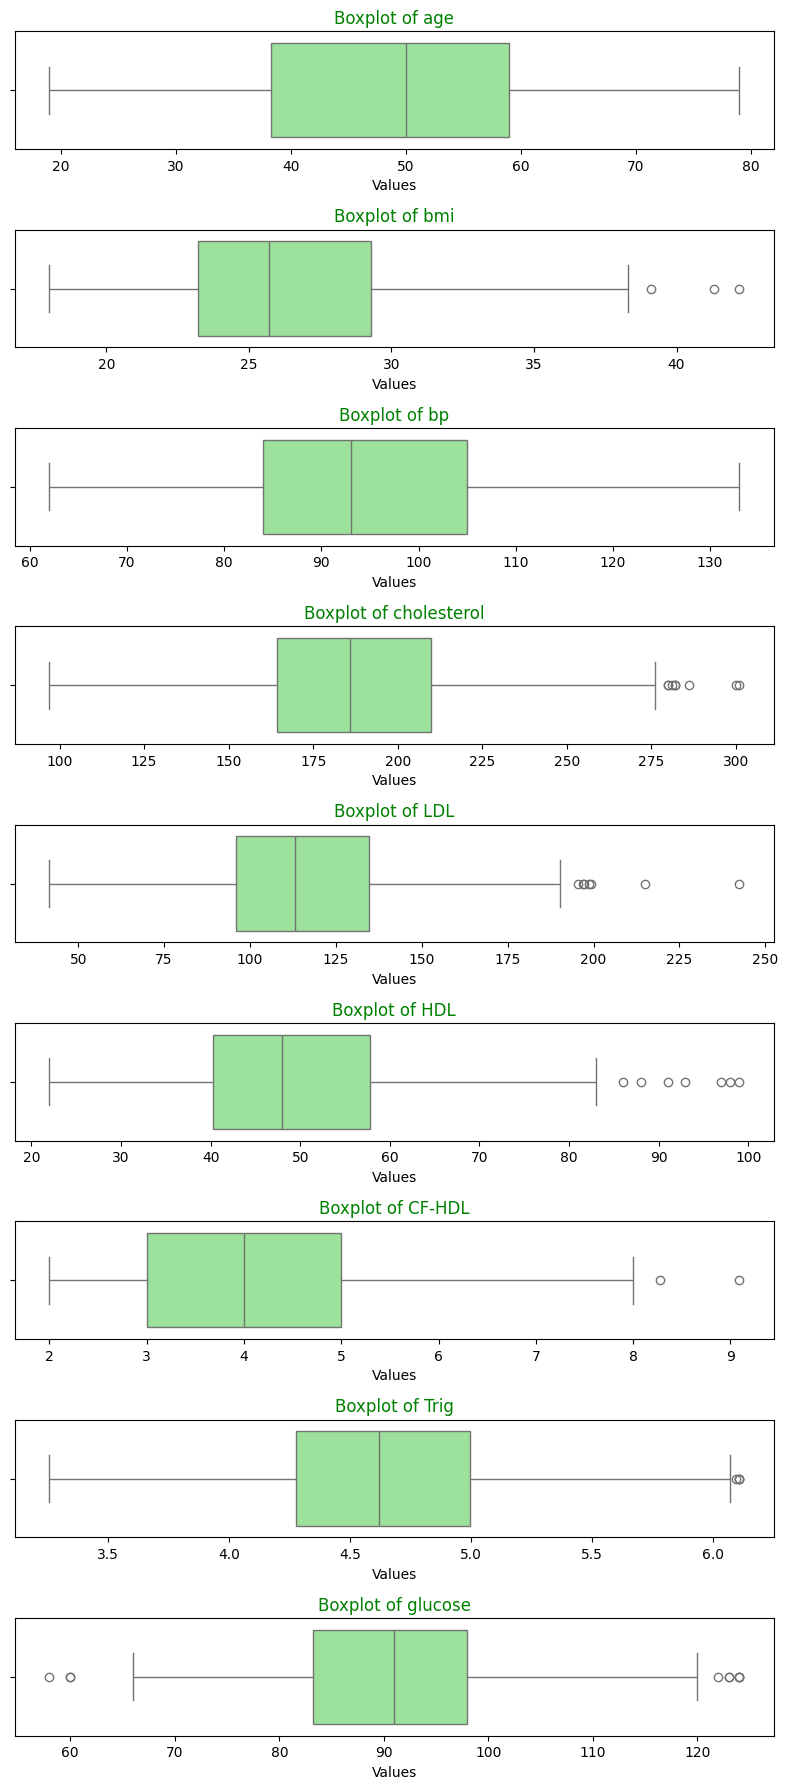

In [55]:
# Lets create a figure which contains a numer of subplot equal to the number of the numerical varibles
# in particular we are taking out of the plots the target and the sex
fig, axes = plt.subplots(ncols=1, nrows=len(df.drop(['target', 'sex'], axis=1).columns), figsize=(8, 2*len(df.drop(['target', 'sex'], axis=1).columns)))

# for each variable create and plot its boxplot
for i, col in enumerate(df.drop(['target', 'sex'], axis=1).columns):
    sns.boxplot(x=df[col], ax=axes[i], color='lightgreen')
    axes[i].set_title(f'Boxplot of {col}', color='green')
    axes[i].set_xlabel("Values")
    axes[i].set_ylabel("")

plt.tight_layout()
plt.show()

**CONCLUSION ON BOXPLOT**:<br>
From the boxplot we can see that appart for age and bp all the other variables present outliers.

### UNDERSTANDING DATA RELATIONS

In [32]:
# dictonary used to apply the change of values as needed for the plots
SEX_MAPPING = {1.0: 'female', 2.0: 'male'}

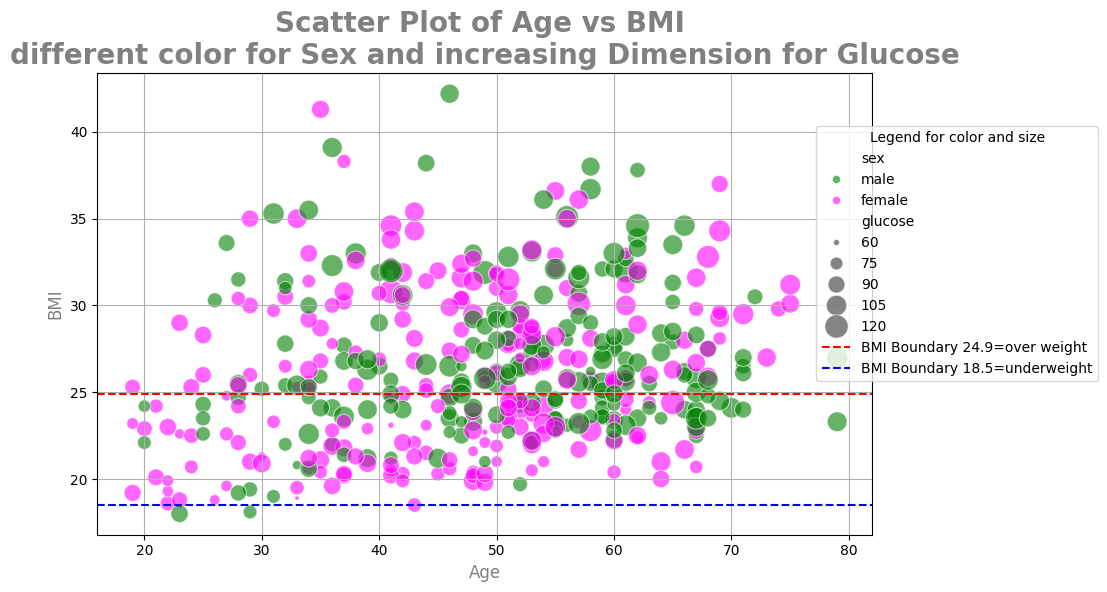

In [35]:
# Lets plot the data based on some features to see how this varibleas are correlated
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['age'],
                y=df['bmi'],
                hue=df['sex'].map(SEX_MAPPING),       #  to color male and female in diferent colors we use the dictonary to visualise the two categories
                size=df['glucose'],  # the varible to use as dimension ioncreasing
                data=df[['sex', 'age', 'bmi', 'glucose']],
                palette={'female': 'fuchsia', 'male': 'green'},  # color fucsia for women and green for men
                sizes=(10, 300),   # range for dimension of glucose
                alpha=0.6)        # shodowing the point to lacate when are one on the other

# set boundaries for BMI index
plt.axhline(y=24.9, color='red', linestyle='--', label='BMI Boundary 24.9=over weight')
plt.axhline(y=18.5, color='blue', linestyle='--', label='BMI Boundary 18.5=underweight')

# set title and axis label
plt.title('Scatter Plot of Age vs BMI \ndifferent color for Sex and increasing Dimension for Glucose', fontsize=20, color="gray", fontweight='bold')
plt.xlabel('Age', fontsize=12, color="gray")
plt.ylabel('BMI', fontsize=12, color="gray")
plt.grid()

# SHOW plot
plt.legend(title='Legend for color and size', loc='upper right', bbox_to_anchor=(1.3, 0.9))
plt.show()

**NOTE ON SCATTER PLOT BMI-AGE**:<br>
This plot help us to visualize how the data are distribueted based on the spacial space given by BMI ad Age, is interesting to see that more than half of the patient presrent in the data set affected by diabetes are over weighted patient and do not seem to be difference between the two sex. We can see from this plot how the glucose level is higher in over weighted patient than the other and the gloucose level of the overweighted patient is egual or above 90 mg/dL.

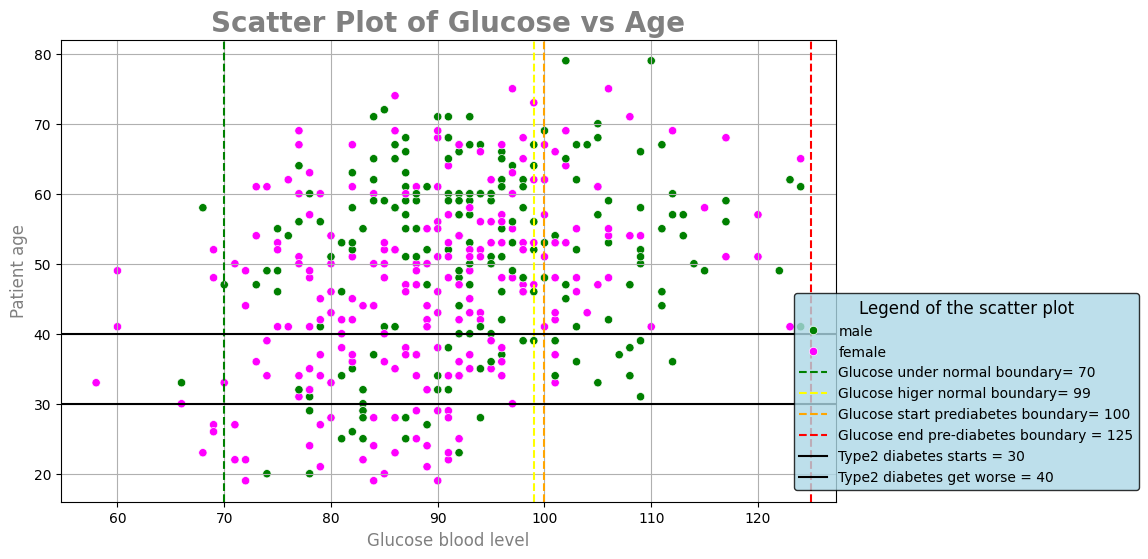

In [54]:
# lets create a scatter plot to see relation between age and glucose
# the aim is to detect pattern of increasing glucose with age
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['glucose'],
                y=df['age'],
                hue=df['sex'].map(SEX_MAPPING),  # we use the dictonary to visualise the two categories on the plot
                data=df[['sex', 'age', 'glucose']],
                palette={'female': 'fuchsia', 'male': 'green'})

# set boundaries of normal glucose fasting blood level for patient with diabetes
plt.axvline(x=70, color='green', linestyle='--', label='Glucose under normal boundary= 70')
plt.axvline(x=99, color='yellow', linestyle='--', label='Glucose higer normal boundary= 99')
plt.axvline(x=100, color='orange', linestyle='--', label='Glucose start prediabetes boundary= 100')
plt.axvline(x=125, color='red', linestyle='--', label='Glucose end pre-diabetes boundary = 125')


# set boundaries at 30 year and at 40 years when diabetes type2 start to get worse
plt.axhline(y=30, color='black', linestyle='-', label='Type2 diabetes starts = 30')
plt.axhline(y=40, color='black', linestyle='-', label='Type2 diabetes get worse = 40')

# set axis, style and color
plt.title('Scatter Plot of Glucose vs Age', fontsize=20, color="gray", fontweight='bold')
plt.xlabel('Glucose blood level', fontsize=12, color="gray")
plt.ylabel('Patient age', fontsize=12, color="gray")
plt.grid()

# set leggend and show plot
plt.legend(title='Legend of the scatter plot',
           facecolor='lightblue',  # color of background for legend box
           edgecolor='black',
           title_fontsize=12,
           loc='lower right', bbox_to_anchor=(1.4, 0.01)) # position of the legend
plt.show()

**CONCLUSION ON THE SCATTER PLOT GLUCOSE-AGE**:<br>
From the plot of the glucose and Age we can see the diabetes tend to get worse with aging, in particular we can see how before 30's the level o glucose is under controll despite the patology of diabetes while passed the 40's tend to give problem to take under controll. We can see also that in relatively young patient the glocuse is more under controll compared to elderly patient, infact passed the 50's we can see some a group of patient with high level of glucose in the blood, is difficult to say if the cause is the diabetes getting worse or the attention paid in the therapy assumed by the partient which will show a gap in takeing care of the patology between the different age patient group.

the variables sex is a categorical one from the description of the daset we can check this and see it is rapresented with two values 2.0 and 1.0 which scaled turned into the following values that we can see with the following two raw of code.

In [56]:
df['sex'][0]

2.0

In [57]:
df['sex'][1]

1.0

In [58]:
# we will changenge the value on sex column in order to be able to plot different color base on sex in a scatter plot
# 1 is for Men and 0 is for women
sex_dict = {2.0:1, 1.0:0}
df["sex"] = df["sex"].map(sex_dict)

The next step will be to visualize the distribution on the features taken pair by pair and check if there are significant correlation, after this step we will calculate the correlation  matrix to quantify all possible correlations.

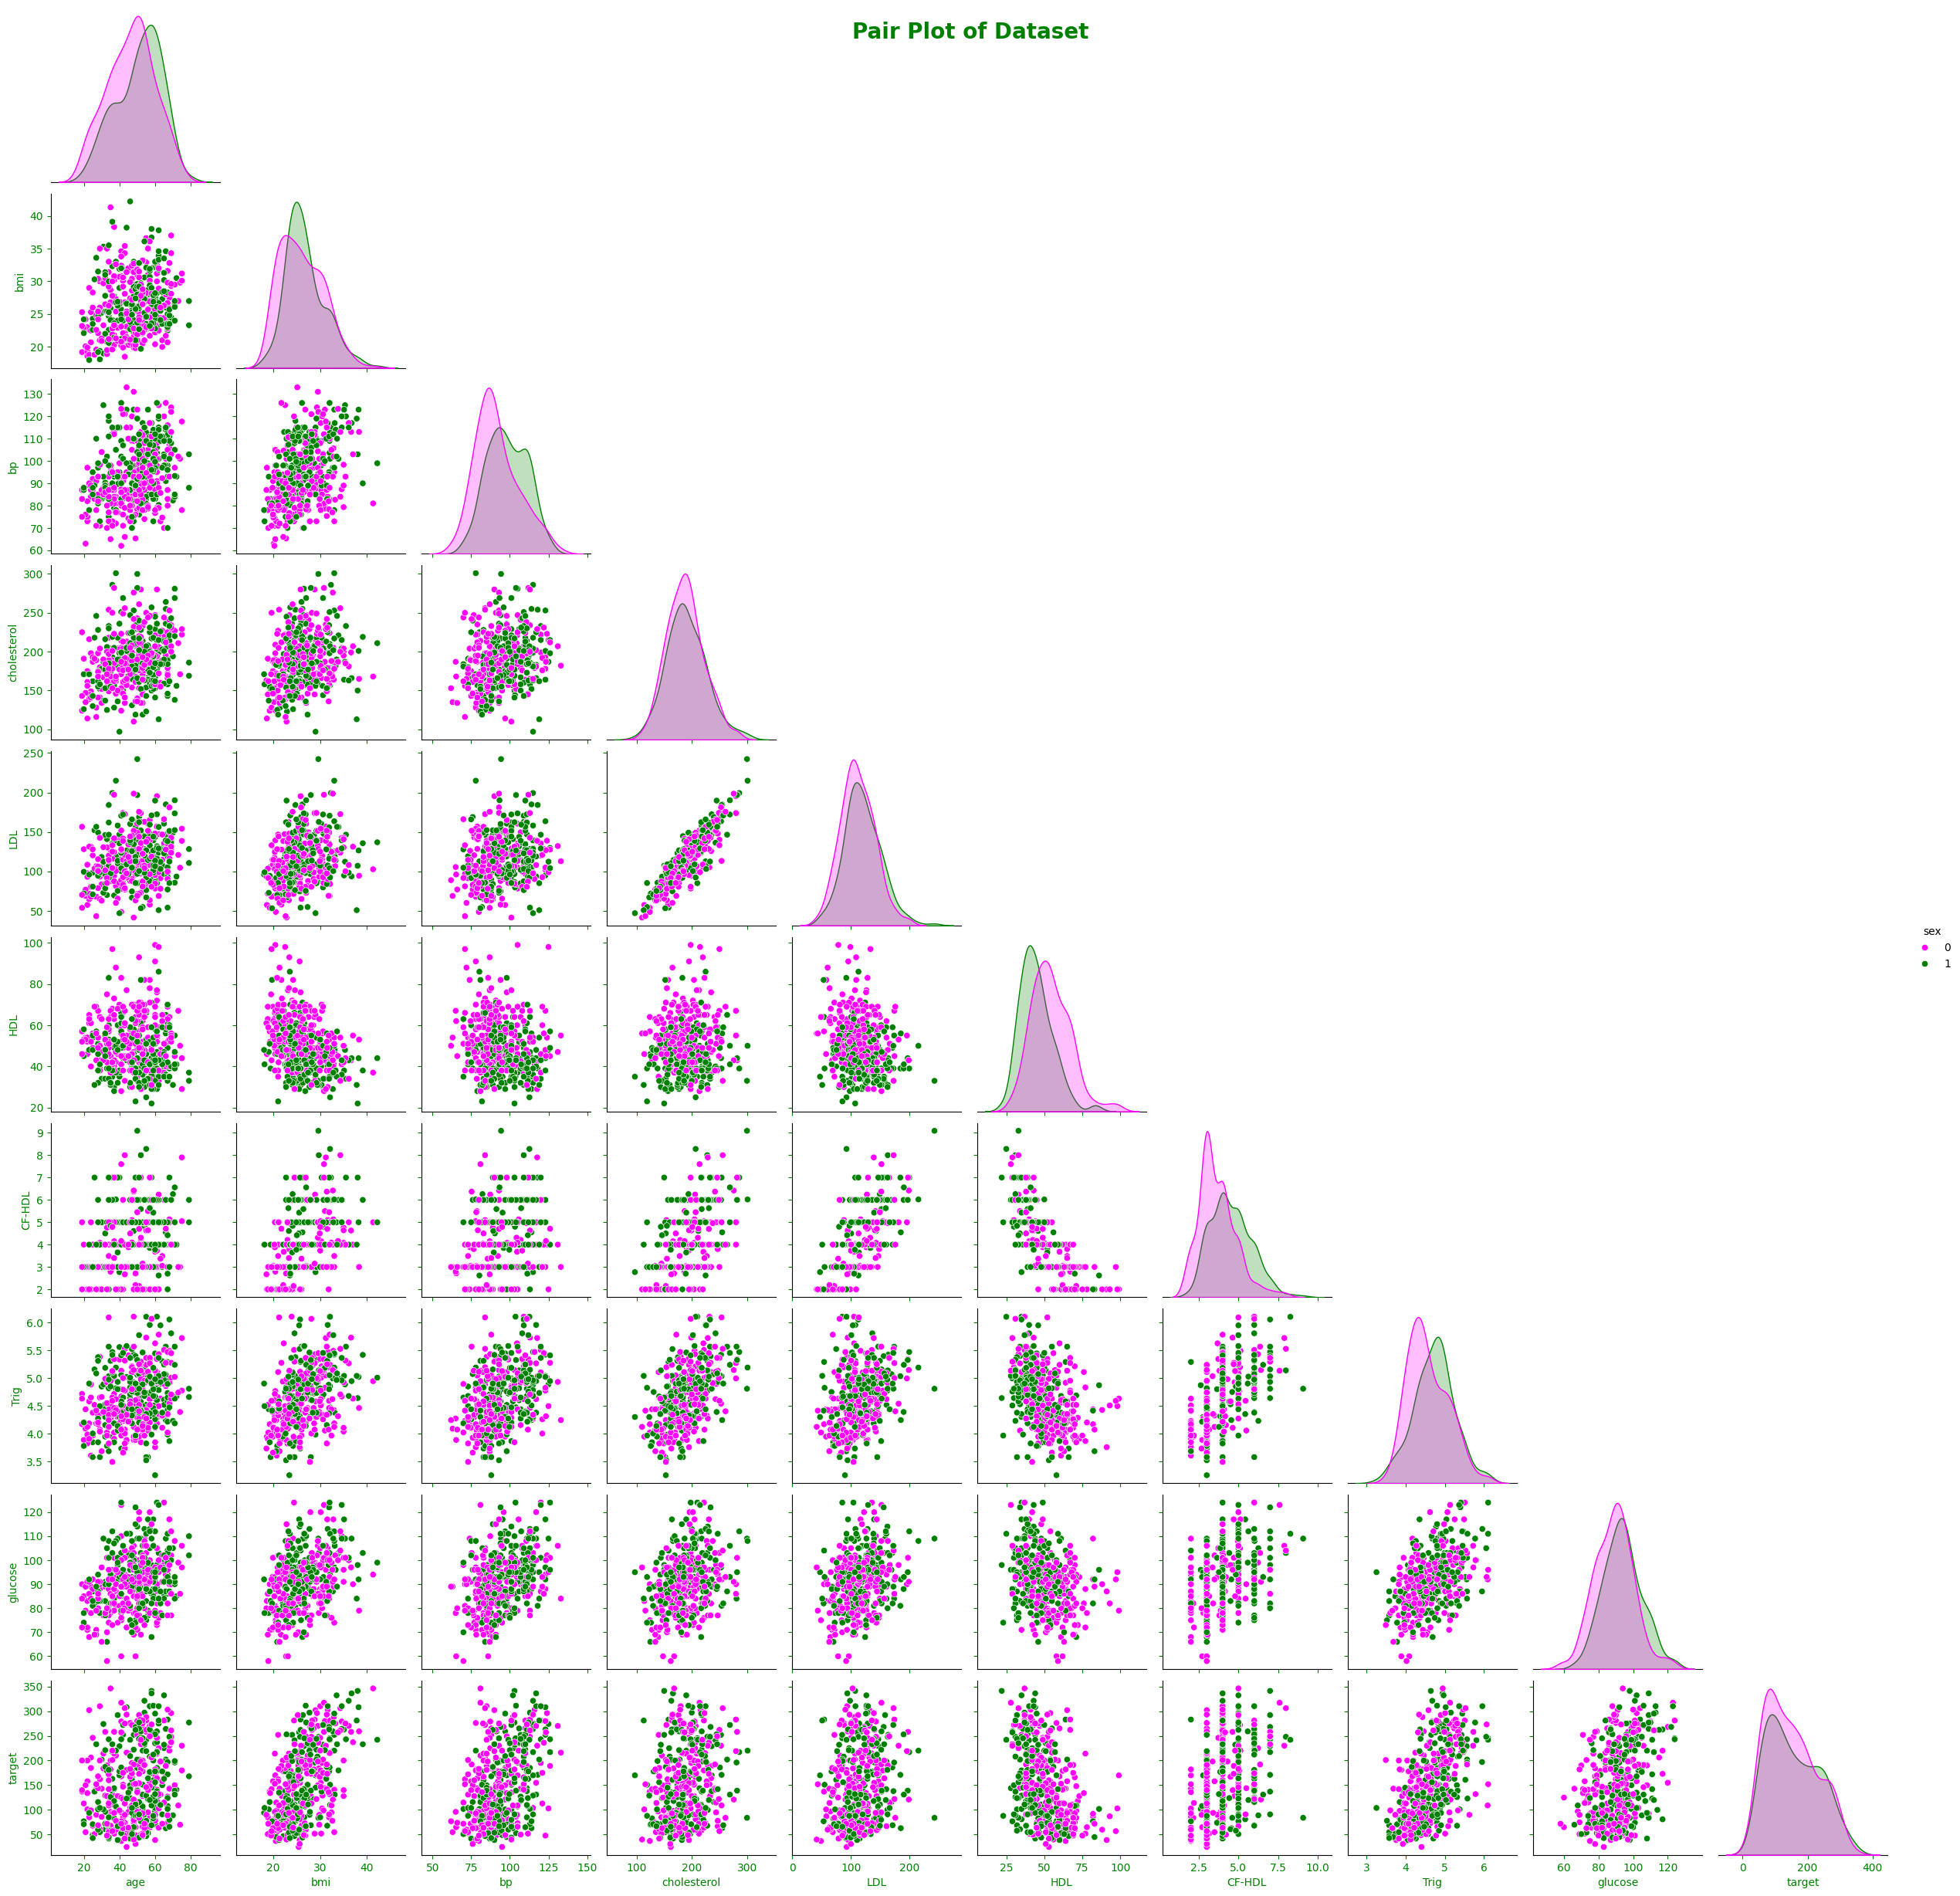

In [60]:
# Lets generate the pair plot which is a scatter plot for each pair of feature present in the dataset
# we are setting a different color for male and female obseravation
sns.pairplot(df, corner=True, hue='sex', palette={1: 'green', 0: 'fuchsia'})
plt.suptitle('Pair Plot of Dataset', fontsize=20, color="green", fontweight='bold')

for ax in plt.gcf().get_axes():
    ax.tick_params(axis='both', colors='green')
    ax.set_xlabel(ax.get_xlabel(), color='green')
    ax.set_ylabel(ax.get_ylabel(), color='green')

plt.show()

**NOTE**<br>
From the pair plot generated we can see there is a strong linear correlation between LDL and cholesterol, while other linear influence can be detected between glucose and CF-HDL, glucose and LDL, glucose and bmi or trig and HDL.

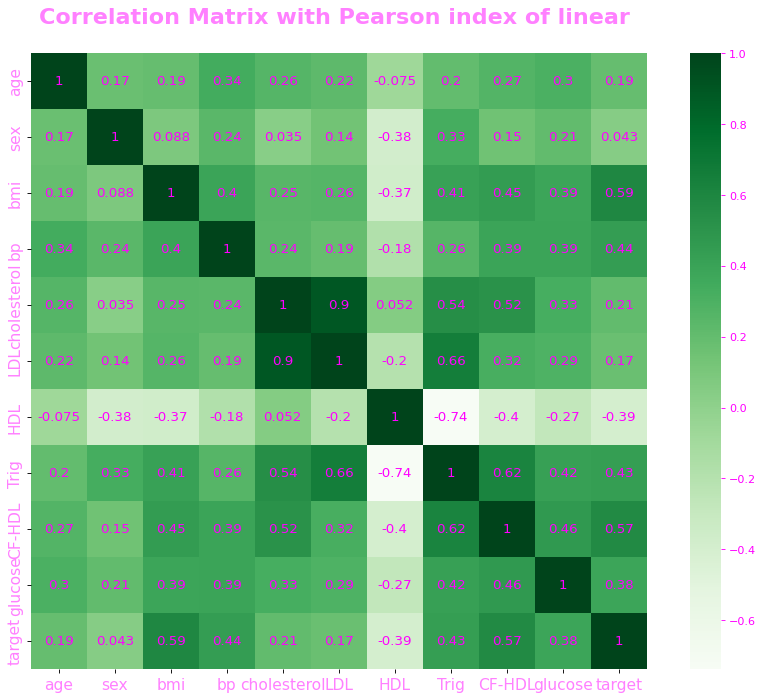

In [35]:
plt.figure(figsize=(14, 10), dpi=80)

# define a particular color
light_fuchsia = '#FF80FF'

correlation_matrix = df.corr()

# Lets define how the correlatrion matrix will be showed by seaborn
hm = sns.heatmap(correlation_matrix,
                 cmap='Greens',
                 cbar=True,
                 square=True,
                 yticklabels=df.columns,
                 xticklabels=df.columns,
                 annot=True,
                 annot_kws={'size':12, 'color':'fuchsia'})

# Set the colobar
cbar = hm.collections[0].colorbar
cbar.ax.yaxis.set_tick_params(color='fuchsia', labelcolor='fuchsia')

# Set the labels
hm.set_xticklabels(hm.get_xticklabels(), color=light_fuchsia, fontsize=14)
hm.set_yticklabels(hm.get_yticklabels(), color=light_fuchsia, fontsize=14)

plt.title('Correlation Matrix with Pearson index of linear \n', fontsize=20, color=light_fuchsia, fontweight='bold')
plt.show()

In [36]:
treshold = 0.6

# Lets print the variable that have a correlation above 0.6 in absolute value
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if i != j:
            corr_value = correlation_matrix.iloc[i, j]
            if abs(corr_value) >= treshold:
                var1 = correlation_matrix.columns[i]
                var2 = correlation_matrix.columns[j]
                print(f"Correlated variables: {var1} e {var2}")
                print(f"Correlation value: {corr_value:.2f}")
                print()

Correlated variables: LDL e cholesterol
Correlation value: 0.90

Correlated variables: Trig e LDL
Correlation value: 0.66

Correlated variables: Trig e HDL
Correlation value: -0.74

Correlated variables: CF-HDL e Trig
Correlation value: 0.62



**NOTE**:<br>
With the treshold we have set a limit for those variables that are strong correlated, this because we don't want to give useless features to our model during the traing. Now we the correlation matrix we know which variables to eliminate to facilitate the learning of the regression model.

### BASELINE FOR LINEAR REGRESSION

In [91]:
# lets slipt dataset in features and target
X = df.drop('target', axis=1)
y = df['target']

# defining a seed
RANDOM_SEED = 301

In [92]:
# Lets standardize our data althogh regression do not suffer from scaling of data
# is a good operation to perform before training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=RANDOM_SEED)

In [97]:
# to proced with Standardization uncomment the following code raw, in case the dataset loaded is not with parameter scaled=True
# and run again the following cell
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

In [40]:
# check on the partitioning of dataset in train and test
print(f"The dimension of the train for input and output are: {X_train.shape} and {y_train.shape}.")
print(f"The dimension of the test for input and output are:{X_test.shape} and {y_test.shape}")

The dimension of the train for input and output are: (375, 10) and (375,).
The dimension of the test for input and output are:(67, 10) and (67,)


In [41]:
# global variable to use with the function show_performance()
ON_TRAIN_SET = "TRAINING SET"
ON_TEST_SET = "TEST SET"

In [42]:
def show_performance(ground_truth, prediction, where):
  """
  This function shows a bunch of metrics used to evaluate models on regression tasks.

  Parameter:
  - prediction(np.array): what the model has predicted
  - ground_trouth(np.array): what are the real target
  - where(str): use to specify if the evaluation is on training or on testing set
  """

  print(f"MODEL EVALUATION RESULTS ON {where}:")
  print(f"MAE = {mean_absolute_error(ground_truth, prediction)}")
  print(f"MSE = {mean_squared_error(ground_truth, prediction)}")
  print(f"RMSE = {np.sqrt(mean_squared_error(ground_truth, prediction))}")
  print(f"R2 = {r2_score(ground_truth, prediction)}")


In [43]:
# Now the we have the partion of the training we procced to train the model
lr = LinearRegression()

lr.fit(X_train, y_train)
y_pred_on_train = lr.predict(X_train)

show_performance(y_train, y_pred_on_train, ON_TRAIN_SET)

MODEL EVALUATION RESULTS ON TRAINING SET:
MAE = 43.130524963767655
MSE = 2825.92700859736
RMSE = 53.159448911716154
R2 = 0.5179495136365884


In [44]:
y_pred_on_test = lr.predict(X_test)
show_performance(y_test, y_pred_on_test, ON_TEST_SET)

MODEL EVALUATION RESULTS ON TEST SET:
MAE = 44.07983698017194
MSE = 3094.939920952291
RMSE = 55.63218421878015
R2 = 0.5089719379719333


**NOTE**<br>
After training the linear regression on a classic hold-out 85:15, and calculate the metrics on both set, training and test, from the result obtained the model is doing a well job as we can see from the metrics of error their are all very near to zero which means the model is not making important error, despite the good performance with the error metric the R2 metric do not seem good at all. For a more detailed history of train I will use a cross validation training not as a mesure to reduce the overfitting which actually is not the case but to have a more statistical evaluation on the different partion used and obtain a mean value of the metrics used.

In [45]:
def performace_on_kf(model, X, y, fold, shuffle_mode=True):
  """
  This function perform the train of the model received in input with the cross validation method.
  The aim is to store the result obtained for the metric of MSE, RMSE, MAE and R2 and return a dictonary
  containing these results of the training and the evaluation of the model.

  Parameter:
  - model():
  - X():
  - y():
  - fold():
  - shuffle_mode(bool):

  Return:
  - scores(dict): contains the result for each metric on train set and test set.
  """

  # prepare the object that will train the model with the cross validation
  kf = KFold(n_splits=fold, shuffle=shuffle_mode, random_state=RANDOM_SEED)

  # prepare a bunch of array to store the results of KF
  train_score_mae = []
  test_score_mae = []

  train_score_mse = []
  test_score_mse = []

  train_score_rmse = []
  test_score_rmse = []

  train_score_r2 = []
  test_score_r2 = []

  # cicle of cross validation
  for train_index, test_index in kf.split(X):

    # lets make the batch to use
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # we can apply or not standardization by comment/uncomment the following line
    ss = StandardScaler()
    X_train = ss.fit_transform(X_train)
    X_test = ss.transform(X_test)

    model.fit(X_train, y_train)
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)

    # score MAE
    mae_train = mean_absolute_error(y_train, pred_train)
    train_score_mae.append(mae_train)
    mae_test = mean_absolute_error(y_test, pred_test)
    test_score_mae.append(mae_test)

    #  score MSE
    mse_train =  mean_squared_error(y_train, pred_train)
    train_score_mse.append(mse_train)
    mse_test = mean_squared_error(y_test, pred_test)
    test_score_mse.append(mse_test)

    # score RMSE
    rmse_train = np.sqrt(mean_squared_error(y_train, pred_train))
    train_score_rmse.append(rmse_train)
    rmse_test = np.sqrt(mean_squared_error(y_test, pred_test))
    test_score_rmse.append(rmse_test)

    # score on R2
    r2_train = r2_score(y_train, pred_train )
    train_score_r2.append(r2_train)
    r2_test = r2_score(y_test, pred_test)
    test_score_r2.append(r2_test)

  # preparing a dict with all the result obtain for each metric on each run of the cross validation
  scores = {
        "mae_train":np.array(train_score_mae),
        "mae_test":np.array(test_score_mae),
        "mse_train":np.array(train_score_mse),
        "mse_test":np.array(test_score_mse),
        "rmse_train":np.array(train_score_rmse),
        "rmse_test":np.array(test_score_rmse),
        "r2_train":np.array(train_score_r2),
        "r2_test":np.array(test_score_r2)
      }

  return scores

In [47]:
# train the model witth cross validation
kf_score_for_lr = performace_on_kf(LinearRegression(), X.values, y.values, fold=5, shuffle_mode=True)

In [48]:
# lets have a look at the result with the cross validation on 5 fold
kf_score_for_lr

{'mae_train': array([43.35523976, 42.23482392, 43.54568107, 43.74984762, 43.04202398]),
 'mae_test': array([43.57661058, 48.43760366, 43.11108805, 41.37809743, 44.08268594]),
 'mse_train': array([2837.72466439, 2705.35018452, 2915.90608568, 2916.05196311,
        2852.06339219]),
 'mse_test': array([3045.21717721, 3536.90077889, 2710.47256143, 2689.99761322,
        2947.95027567]),
 'rmse_train': array([53.27029814, 52.01298092, 53.99913042, 54.00048114, 53.4047132 ]),
 'rmse_test': array([55.18348645, 59.47184863, 52.06219897, 51.86518691, 54.29502994]),
 'r2_train': array([0.51747988, 0.53889425, 0.49896531, 0.52006711, 0.52421521]),
 'r2_test': array([0.50233026, 0.42033928, 0.57288794, 0.49511406, 0.47139853])}

In [49]:
# show the mean of each metric based on the result obtained on each fold of the cross validation
for k, v in kf_score_for_lr.items():
  print(f"{k}: {v.mean()}")

mae_train: 43.18552326910999
mae_test: 44.117217131557815
mse_train: 2845.419257975572
mse_test: 2986.107681284141
rmse_train: 53.33752076464581
rmse_test: 54.57555017857069
r2_train: 0.5199243515622205
r2_test: 0.4924140129034932


**NOTE**<br>
From the result obtained the value looks similar with the one obtained with the hold out as conclusion our model is seem very good with the metrics of error as MAE, MSE and RMSE but the R2 is even worse then on the hold-out and the value is not good.

In [50]:
def learing_curve_on_error_metrics(ml_model, X, y, fold, seed):
    """
    This function allow to plot a figure divede in four subfigure or subplot each one of these figures
    show the learning curve regarding a particular metrics between MSE, RMSE, MAE and R2, this function
    help to visualize how the traing went and if there is presence of overfitting.

    Parameter:
    - ml_model(sklearn ML model): it is a machine learnign model of the scikit learn library, that will be used.
    - X(DataFrame or np.array): the feature to give as input to the model.
    - y(Series pandas or np.array): the target.
    - fold(int): integer that represent the fold used by the cross validation
    - seed(int): to make the process reapetable
    """
    # Calculate learning curves for metrics MSE, RMSE, MAE, R2
    train_sizes_abs, train_mse, test_mse = learning_curve(
                                              ml_model,
                                              X,
                                              y,
                                              scoring='neg_mean_squared_error',
                                              cv=fold,
                                              random_state=seed)
    train_rmse = np.sqrt(-train_mse)
    test_rmse = np.sqrt(-test_mse)

    train_sizes_abs, train_mae, test_mae = learning_curve(
                                            ml_model,
                                            X,
                                            y,
                                            scoring='neg_mean_absolute_error',
                                            cv=fold,
                                            random_state=seed)

    train_sizes_abs, train_r2, test_r2 = learning_curve(
                                              ml_model,
                                              X,
                                              y,
                                              scoring='r2',
                                              cv=fold, # occhio!!
                                              random_state=seed)

    # get the mean from the score obtained for each metric
    train_mse_mean = -np.mean(train_mse, axis=1)
    test_mse_mean = -np.mean(test_mse, axis=1)

    train_rmse_mean = np.mean(train_rmse, axis=1)
    test_rmse_mean = np.mean(test_rmse, axis=1)

    train_mae_mean = -np.mean(train_mae, axis=1)
    test_mae_mean = -np.mean(test_mae, axis=1)

    train_r2_mean = np.mean(train_r2, axis=1)
    test_r2_mean = np.mean(test_r2, axis=1)

    # Plot the lerning curve divinding the figure in 4 subplot
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(12, 8))

    # make plot for MSE learning curve
    ax1.plot(train_sizes_abs, train_mse_mean, label='Training MSE', color=light_fuchsia)
    ax1.plot(train_sizes_abs, test_mse_mean, label='Test MSE', color='green')
    ax1.set_title('MSE')
    ax1.grid()
    ax1.legend()

    # make plot for RMSE learning curve
    ax2.plot(train_sizes_abs, train_rmse_mean, label='Training RMSE', color=light_fuchsia)
    ax2.plot(train_sizes_abs, test_rmse_mean, label='Test RMSE', color='green')
    ax2.set_title('RMSE')
    ax2.grid()
    ax2.legend()

    # make plot for MAE learning curve
    ax3.plot(train_sizes_abs, train_mae_mean, label='Training MAE', color=light_fuchsia)
    ax3.plot(train_sizes_abs, test_mae_mean, label='Test MAE', color='green')
    ax3.set_title('MAE')
    ax3.grid()
    ax3.legend()

    # make plot for R2 learning curve
    ax4.plot(train_sizes_abs, train_r2_mean, label='Training score R²', color=light_fuchsia)
    ax4.plot(train_sizes_abs, test_r2_mean, label='Test score R²', color='green')
    ax4.set_ylim([-2, 1])
    ax4.set_title('R²')
    ax4.grid()
    ax4.legend()

    plt.suptitle('Learning Curves', fontsize=22, fontweight='bold', color=light_fuchsia)
    plt.show()

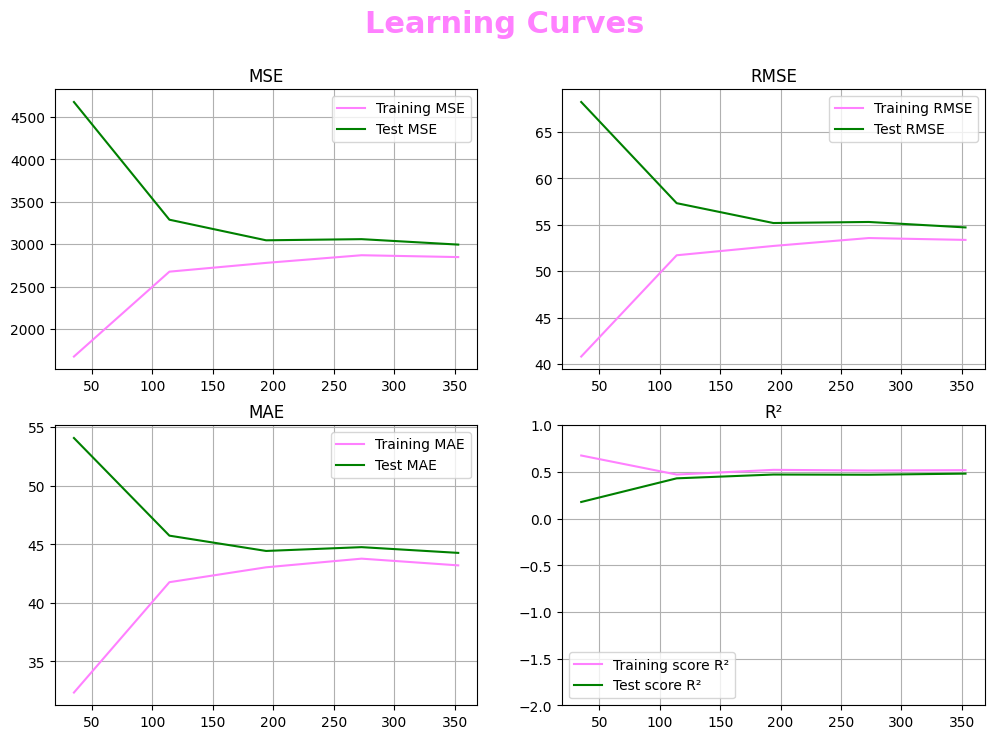

In [55]:
# lets plot the learning curve for the metrics MSE, RMSE, MAE and R2"
learing_curve_on_error_metrics(LinearRegression(), X, y, 5, RANDOM_SEED)

**CONCLUSION ON THE BASELINE**:<br>
As already seen, the model trained is not affected by overfitting. Looking at the error metrics all of them are near to zero which is pretty good, but I can't understand why R2 is not good at all.

## TRAING THE MODEL WITH FEATURE SELECTION
First we will try to train the model removing the feature that where highly correlated, this beacuse this variables bring to the model the same information causing the training of the model to be more difficult and longer without apporting improvement, this because one variable can explain the other strongly correlated and there is no more information that the model can learn. After the removal of the most correlated variables we will train the model and evaluate its performance.<br>
<br>

Secondly we will try to apply the process of feature selection with the SelectBestK that will give us the best variables most related to the target to train the model. With this feature extracted we will train the model and evaluate its performance.

In [56]:
def prepare_train_evaluate(model, data_train, data_test, ground_truth_train, ground_trouth_test):
  """
  This function train a model received as input on the partion train set and get the prediction
  on train set and test set in order to be able to evaluate the model with the prediction collected
  calling at the functionm  show_performance() which will print the results of metrics used.

  Parameter:
  - model( sklearn ML model): model to train.
  - data_train(Dataframe or np.array): train set feature.
  - data_test(Dataframe or np.array): test set feature.
  - ground_truth_train(Dataseries or np.array): train target.
  - ground_truth_test(Dataseries or np.array): test target.
  """

  # train the model and get prediction on train set and test set
  model.fit(data_train, ground_truth_train)
  train_prediction = model.predict(data_train)
  test_prediction = model.predict(data_test)

  # show performance on both partition
  show_performance(ground_truth_train, train_prediction, ON_TRAIN_SET)
  print("\n")
  show_performance(ground_trouth_test, test_prediction, ON_TEST_SET)

In [57]:
# based on the correlation matrix we remove the variable strongly correlated
X_rmv_corr = X.drop(['HDL', 'LDL', 'CF-HDL'], axis=1)
X_rmv_corr

,age,sex,bmi,bp,cholesterol,Trig,glucose
0,59.0,1,32.1,101.00,157.0,4.00,87.0
1,48.0,0,21.6,87.00,183.0,3.00,69.0
2,72.0,1,30.5,93.00,156.0,4.00,85.0
3,24.0,0,25.3,84.00,198.0,5.00,89.0
4,50.0,0,23.0,101.00,192.0,4.00,80.0
...,...,...,...,...,...,...,...
437,60.0,1,28.2,112.00,185.0,4.00,93.0
438,47.0,1,24.9,75.00,225.0,5.00,102.0
439,60.0,1,24.9,99.67,162.0,3.77,95.0
440,36.0,0,30.0,95.00,201.0,4.79,85.0


In [60]:
# prepare the data as train and teste set
X_train_rmv_corr, X_test_rmv_corr, y_train_rmv_corr, y_test_rmv_corr = train_test_split(X_rmv_corr, y, test_size=0.15, random_state=RANDOM_SEED)

ss_rmv_corr = StandardScaler()
X_train_rmv_corr = ss.fit_transform(X_train_rmv_corr)
X_test_rmv_corr = ss.transform(X_test_rmv_corr)

In [61]:
# train the model and show the result on both patition
lr_rmv_corr = LinearRegression()
prepare_train_evaluate(lr_rmv_corr, X_train_rmv_corr, X_test_rmv_corr, y_train_rmv_corr, y_test_rmv_corr)

MODEL EVALUATION RESULTS ON TRAINING SET:
MAE = 46.15230043754029
MSE = 3197.2436443032834
RMSE = 56.544174273777166
R2 = 0.45460981509083254


MODEL EVALUATION RESULTS ON TEST SET:
MAE = 45.042978559386285
MSE = 3291.755398282258
RMSE = 57.3738215415555
R2 = 0.4777461549587605


In [62]:
# use the cross validation to train the model and show the mean of the result for each metrric used
kf_score_for_lr_rmv_corr = performace_on_kf(LinearRegression(), X_rmv_corr.values, y.values, fold=5, shuffle_mode=True)
for m, r in kf_score_for_lr_rmv_corr.items():
  print(f"{m}: {r.mean()}")

mae_train: 46.04123131754665
mae_test: 46.79591355570017
mse_train: 3195.540251767447
mse_test: 3304.5926160535646
rmse_train: 56.52142510640599
rmse_test: 57.38324685776454
r2_train: 0.4608405220039612
r2_test: 0.4381992850224218


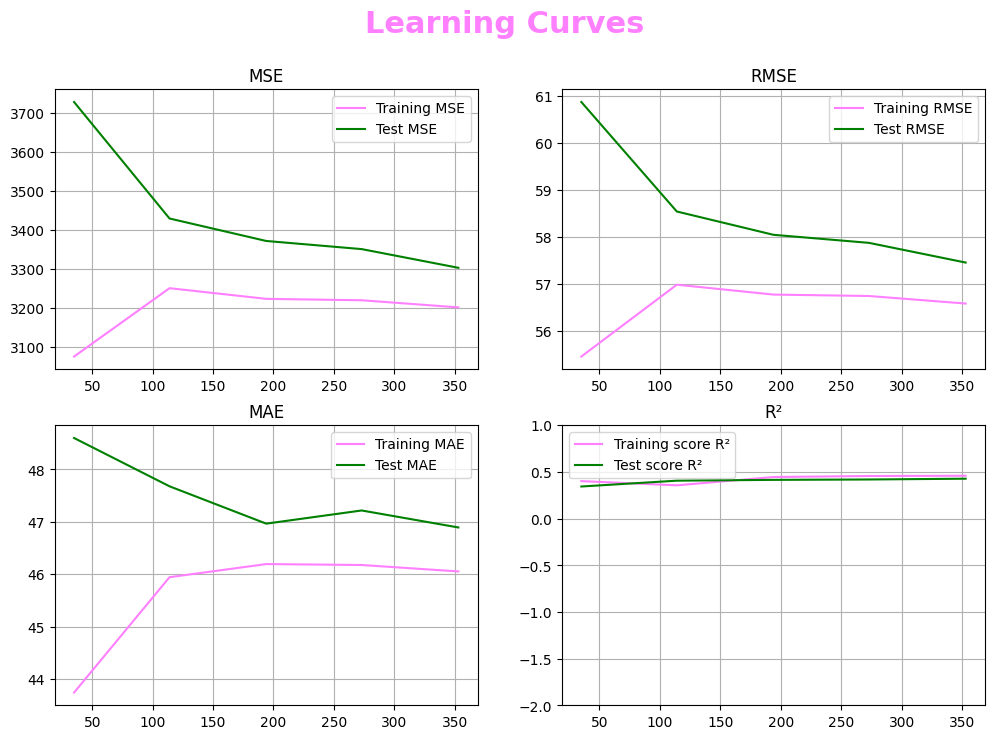

In [63]:
# lets plot the learnign curves on the metrics we are using
learing_curve_on_error_metrics(LinearRegression(), X_rmv_corr, y, 5, RANDOM_SEED)

### FEATURE SELECTION WITH SELECTKBEST

In [152]:
# we started with a k = 5, note that if we decrease k to less than 5 or increase k above 5 the performance get worse.
selector = SelectKBest(f_regression,k = 5)

In [153]:
# apply feature selection
X_fs = selector.fit_transform(X,y)

In [154]:
X_fs

array([[ 32.1   , 101.    ,  38.    ,   4.    ,   4.8598],
       [ 21.6   ,  87.    ,  70.    ,   3.    ,   3.8918],
       [ 30.5   ,  93.    ,  41.    ,   4.    ,   4.6728],
       ...,
       [ 24.9   ,  99.67  ,  43.    ,   3.77  ,   4.1271],
       [ 30.    ,  95.    ,  42.    ,   4.79  ,   5.1299],
       [ 19.6   ,  71.    ,  97.    ,   3.    ,   4.5951]])

In [155]:
# partitioning of the date in train and test
X_train_fs, X_test_fs, y_train_fs, y_test_fs = train_test_split(X_fs, y, test_size=0.15, random_state=RANDOM_SEED)

ss_fs = StandardScaler()
X_train_fs = ss.fit_transform(X_train_fs)
X_test_fs = ss.transform(X_test_fs)

In [156]:
# training the model and show results
lr_fs = LinearRegression()
prepare_train_evaluate(lr_fs, X_train_fs, X_test_fs, y_train_fs, y_test_fs)

MODEL EVALUATION RESULTS ON TRAINING SET:
MAE = 44.78103907373204
MSE = 2987.9004724532824
RMSE = 54.66169108665851
R2 = 0.49031985908706455


MODEL EVALUATION RESULTS ON TEST SET:
MAE = 44.52942307498543
MSE = 3083.2140141464934
RMSE = 55.52669640944339
R2 = 0.5108323131137553


In [157]:
# using the cross validation to train the model and show the mean of each metric used
kf_score_for_lr_fs = performace_on_kf(LinearRegression(), X_fs, y.values, fold=5, shuffle_mode=True)
for m, r in kf_score_for_lr_rmv_corr.items():
  print(f"{m}: {r.mean()}")

mae_train: 46.04123131754665
mae_test: 46.79591355570017
mse_train: 3195.540251767447
mse_test: 3304.5926160535646
rmse_train: 56.52142510640599
rmse_test: 57.38324685776454
r2_train: 0.4608405220039612
r2_test: 0.4381992850224218


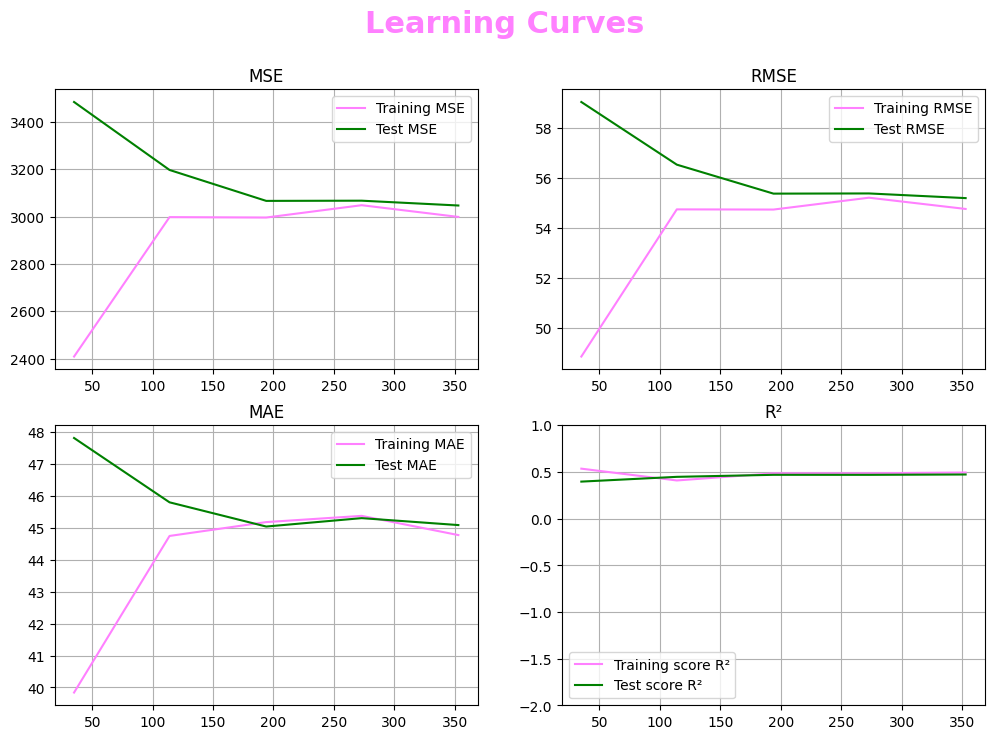

In [158]:
# plot the learning curve on the error metrics
learing_curve_on_error_metrics(LinearRegression(), X_fs, y, 5, RANDOM_SEED)

**CONCLUSION**:<br>
Also the experiment conducted by removing the most correlated variable or using the feture selection do not have change completely the result. The error metrics continue to be low which to my knowledge look good, but R2 is too low even using a cross validation. From the learning curves I do not reckonize overfitting.

### MAKE SOME TRIAL
We will use a Ridge regression or Lasso regretion, just to see if there are any change in the result, but as stated before from previuos learning curve the overfitting is not present in the plot

In [86]:
# if we change the alpha parameter the model is pretty much stable on the metrics
ridge_fs = Ridge(1.0)
prepare_train_evaluate(ridge_fs, X_train_fs, X_test_fs, y_train_fs, y_test_fs)

MODEL EVALUATION RESULTS ON TRAINING SET:
MAE = 44.78965501317088
MSE = 2987.9187900706456
RMSE = 54.66185864083516
R2 = 0.49031673444289225


MODEL EVALUATION RESULTS ON TEST SET:
MAE = 44.52611653518022
MSE = 3083.2500667622476
RMSE = 55.52702105067629
R2 = 0.510826593181706


In [77]:
# if we change the alpha parameter is possible to change as well the result on the metrics
# althought if we increase alpha the performance get worse and 1.0 seem top be the best value
# to obtain the best performance
lasso_fs = Lasso(alpha=1.0)
prepare_train_evaluate(lasso_fs , X_train_fs, X_test_fs, y_train_fs, y_test_fs)

MODEL EVALUATION RESULTS ON TRAINING SET:
MAE = 44.79216044938012
MSE = 2987.93494374551
RMSE = 54.66200640065739
R2 = 0.4903139789269849


MODEL EVALUATION RESULTS ON TEST SET:
MAE = 44.53623222704223
MSE = 3083.4557704623257
RMSE = 55.528873304456
R2 = 0.5107939572366533


**NOTE**:<br>
on this last model lasso_fs the R2 is very bad.